<a href="https://colab.research.google.com/github/Flor-Si/Trabajo-Final-Ing-2025/blob/main/trabajo_final_calidad_del_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INFORME SOBRE LA CALIDAD DEL AIRE EN UN ESPACIO CON MUCHOS GASES CONTAMINANTES**

In [ ]:

#Objetivo:Determinar la distribución temporal de los gases contaminantes que se generan en un espacio "Autopista" con un elevado nivel de contaminación
# feature del data set

#0 Fecha (DD/MM/AAAA)
#1 Hora (HH.MM.SS)
#2 Concentración media horaria real de CO en mg/m^3 (analizador de referencia)
#3 Respuesta del sensor media horaria PT08.S1 (óxido de estaño) (nominalmente objetivo de CO)
#4 Concentración total media horaria real de hidrocarburos no metánicos en microg/m^3 (analizador de referencia)
#5 Concentración media horaria real de benceno en microg/m^3 (analizador de referencia)
#6 Respuesta del sensor media horaria PT08.S2 (titania) (nominalmente objetivo de NMHC)
#7 Concentración media horaria real de NOx en ppb (analizador de referencia)
#8 Respuesta del sensor media horaria PT08.S3 (óxido de tungsteno) (nominalmente objetivo de NOx)
#9 Concentración media horaria real de NO2 en microg/m^3 (analizador de referencia)
#10 Respuesta del sensor media horaria PT08.S4 (óxido de tungsteno) (nominalmente objetivo NO2)
#11 PT08.S5 (óxido de indio) respuesta del sensor promedio por hora (nominalmente objetivo O3)
#12 Temperatura en °C
#13 Humedad relativa (%)
#14 AH Humedad absoluta




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Leemos nuevamente los datos del CSV Calidad del Aire
calidad_air = pd.read_csv('/content/AirQuality.csv', sep=";", encoding='latin1')

In [ ]:
calidad_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
#Observamos el tipo de las varibles que contiene , si son Int,Float,Object
calidad_air.dtypes

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [ ]:
#Imprimimos para ver las cantidad de datos en las filas y columnas tenemos y si se observa un NaN (nulo)
print(calidad_air)

            Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0     

In [ ]:
#Determinamos la cantidad de filas y columnas de nuestro dataset
calidad_air.shape

(9471, 17)

In [23]:
calidad_air_drop= calidad_air.dropna()

In [24]:
calidad_air_drop.shape

(0, 17)

In [ ]:
#Vemos la cantidad de columnas que contiene nuestro dataset
print(calidad_air.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [ ]:
#Utilizamos la función info que nos determina que es un "DataFrame" y nos da la posibilidad de analizarlo y nos dice cuantos no nulos tenemos
calidad_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
#Revisamos si tienen valores NaN en las columnas
columnas_nan= calidad_air.columns[calidad_air.isna().all()]
columnas_nan

Index(['Unnamed: 15', 'Unnamed: 16'], dtype='object')

In [ ]:
#Revisamos si hay algun NaN si hay en alguna fila o columna
columnas_nan_alguno= calidad_air.columns[calidad_air.isna().any()]
columnas_nan_alguno

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
#Evaluamos si tenemos NaN en las filas
filas_nan= calidad_air[calidad_air.isnull().all(axis=1)]
filas_nan


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Evaluamos si tenemos NaN en las filas alguna
filas_nan_algunas= calidad_air[calidad_air.isnull().any(axis=1)]
filas_nan_algunas


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Con la función discribe tenemos estadísticas básicas (media, mediana, desvío, valores máximos y mínimos) de columnas numérica
calidad_air.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [ ]:
#VISUALIZACION DE DATOS

In [ ]:
#Importa las librerias matplotlib y seaborn # Con estas funciones realizamos el tema de los graficos y visualizaciones que nos solicitan

import matplotlib.pyplot as plt # Las siglas plt es del tipo de la visualización por defecto
import seaborn as sns # Y la funcion sns es del tipo por defecto con que se llama la función


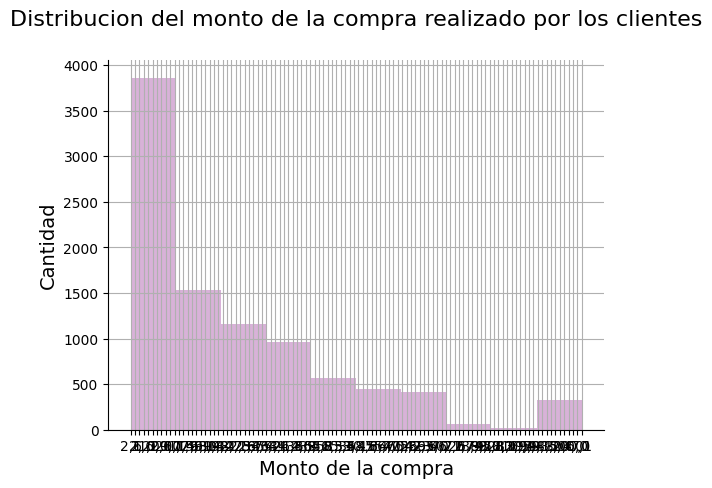

In [ ]:
# Grafico CO(GT)

plt.figure()# Como importamos el are del  dibujo
plt.hist(calidad_air['CO(GT)'].dropna(), bins=10, color="purple", alpha=0.3)# Hist significa como genera el histograma , luego utiliza la funcion "dropna" elimina las celdas nulas, "bins" son la cantidad de barras que voy a utilizar y que sea representativa, luego defino el color y con alpha me define la intensidad del color
plt.ylabel("Cantidad", size=14) # Label es para poner el nombre de los titulos de los ejes "Y" y con size defino el tamaño de la letra
plt.xlabel("Monto de la compra", size=14)# Label es par poner el nombre de los titulos del eje "x" , con size defino el tamaño de la letra
plt.title("Distribucion del monto de la compra realizado por los clientes", size=16, pad=25)# Title es el nombre del grafico y de tamaño 16 de la letra
plt.gca().spines["top"].set_visible(False)# son "spine" termino de redondear el area del grafico y con Tue o false de el recuadro del grafico
plt.gca().spines["right"].set_visible(False)
plt.grid(True)# Con "grid", pone loas lineas con que se divide como por ejemplo de 0 a 5000 de 5000 a 10000 son esas lineas y si ponemos False las elimina las deja invisibles
plt.show()# Y esto es super importante porque te muestra el grafico sino de lo contrario no veriamos nada


In [ ]:
#Definimos los Boxplot


In [ ]:
print(calidad_air.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [ ]:
boxplot_calidad_aire = calidad_air.melt(id_vars='Date', value_vars=['CO(GT)'])

In [ ]:

boxplot_calidad_aire.head()

,Date,variable,value
0,10/03/2004,CO(GT),"2,6"
1,10/03/2004,CO(GT),2
2,10/03/2004,CO(GT),"2,2"
3,10/03/2004,CO(GT),"2,2"
4,10/03/2004,CO(GT),"1,6"


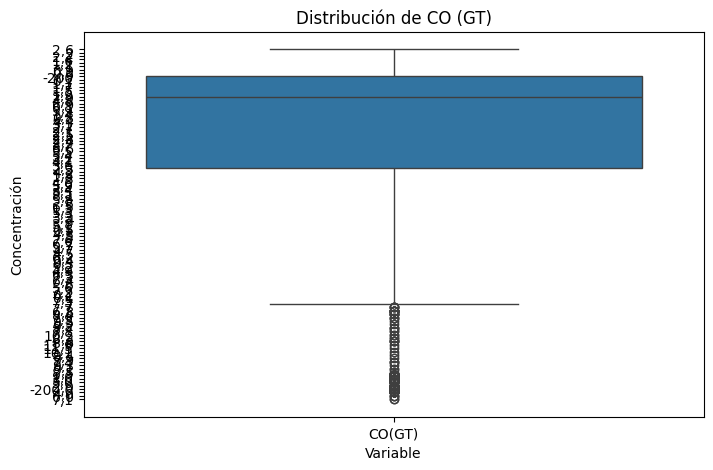

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=boxplot_calidad_aire, x='variable', y='value')
plt.title('Distribución de CO (GT)')
plt.ylabel('Concentración')
plt.xlabel('Variable')
plt.show()